In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
#Reading data
data = pd.read_csv('Salary_Data (1).csv')

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


c:\Users\purva\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

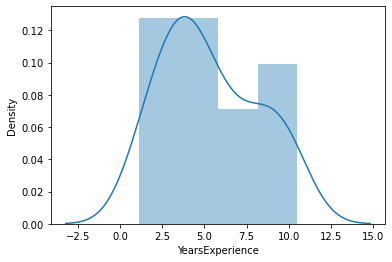

In [6]:
sns.distplot(data['YearsExperience'])


c:\Users\purva\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

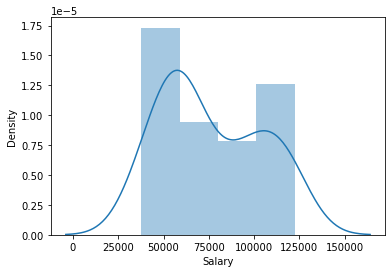

In [7]:
sns.distplot(data['Salary'])

# Correlation Analysis

In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

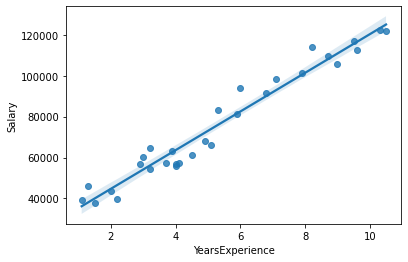

In [9]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])


# Model Building

In [10]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [11]:
#Finding Coefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
#Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [13]:
#Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [19]:
#Manual prediction for say 4 Years Experience
Salary = (34782.251348) + (8564.9443420)*(4)
Salary

69042.028716

In [22]:
#Automatic Prediction for say 4 & 7 Years Experience 
new_data=pd.Series([4,7])
new_data

0    4
1    7
dtype: int64

In [23]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,4
1,7


In [24]:
model.predict(data_pred)

0    63592.049484
1    91941.936449
dtype: float64